## 1. Problem Statement

- This project aims to analyze how various factors, including Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course, impact students' performance on tests. By examining these variables, we seek to gain insights into their influence on test scores and identify potential patterns or disparities.

## 2. Data Collection

- **Data Source**: [Student Performance Dataset on Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- **Dataset Details**: The dataset comprises 8 columns and 1000 rows.

### 2.1 Data Description

The dataset includes the following columns:

- **Gender**: The gender of the student (e.g., female, male).
- **Race/Ethnicity**: The race or ethnicity group of the student (e.g., group A, group B, group C, group D, group E).
- **Parental Level of Education**: The highest level of education attained by the student's parents (e.g., associate's degree, bachelor's degree, some college, high school).
- **Lunch**: The type of lunch the student receives (e.g., standard, free/reduced).
- **Test Preparation Course**: Whether the student completed a test preparation course (e.g., none, completed).
- **Math Score**: The student's score in math (ranging from 0 to 100).
- **Reading Score**: The student's score in reading (ranging from 0 to 100).
- **Writing Score**: The student's score in writing (ranging from 0 to 100).

### 2.2 Importing Data and Required Packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2.3 Importing the dataset as Pandas DataFrame

In [12]:
data = pd.read_csv("StudentsPerformance.csv")

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.4 Checking Data Types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2.5 Number of Rows and Columns

In [17]:
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns")

Data has 1000 rows and 8 columns


### 2.6 List of Features

In [39]:
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average score'],
      dtype='object')


## 3. Data Checks

To ensure data quality and integrity, perform the following checks:

1. **Check for Missing Values**
   - Identify any missing or null values in the dataset.
   - Determine the percentage of missing values for each column.

2. **Check for Duplicates**
   - Identify and count any duplicate rows in the dataset.
   - Remove duplicates if necessary to avoid redundant data.

3. **Check the Number of Unique Values in Each Column**
   - Determine the number of unique values for each column.
   - This helps in understanding the diversity of data in each categorical column.

4. **Check Statistics of the Dataset**
   - Compute and review basic statistical measures such as mean, median, standard deviation, minimum, and maximum for numerical columns.
   - This provides insights into the distribution and spread of numerical data.

5. **Check Categories in Categorical Columns**
   - Identify and list all the categories present in each categorical column (e.g., Gender, Race/Ethnicity, Parental Level of Education, Lunch, Test Preparation Course).
   - Ensure that categories are correctly labeled and consistent.

### 3.1 Checking Missing values

In [18]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There a no null values in any of the Columns in our Dataset

### 3.2  Check for Duplicates

In [19]:
data.duplicated().sum()

0

There are no Duplicates entries in our Dataset

### 3.3 Check the number of unique values in each columns

In [24]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

The dataset features categorical columns with a limited number of unique values—2 for Gender, 5 for Race/Ethnicity, 6 for Parental Level of Education, 2 for Lunch, and 2 for Test Preparation Course indicating discrete categories, while the numerical columns show a broader range with 81 unique values for Math Score, 72 for Reading Score, and 77 for Writing Score, reflecting diverse student performance.

### 3.4 Check the Statistics of Dataset

In [25]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The statistics reveal that students' scores in math, reading, and writing exhibit a broad range, with mean scores around 66, 69, and 68 respectively, and a standard deviation of approximately 15, indicating significant variability in performance; scores range from a minimum of 0 to a maximum of 100, with the 25th, 50th, and 75th percentiles showing a gradual increase in scores across all subjects.

### 3.5 Exploaring Catgorical Columns

In [29]:
# Print the unique categories in the 'Gender' variable
print("Categories in 'Gender' variable:", end=" ")
print(data['gender'].unique())

# Print the unique categories in the 'Race/Ethnicity' variable
print("Categories in 'Race/Ethnicity' variables:", end=" ")
print(data['race/ethnicity'].unique())

# Print the unique categories in the 'Parental Level of Education' variable
print("Categories in 'Parental Level of Education' variables:", end=" ")
print(data['parental level of education'].unique())

# Print the unique categories in the 'Lunch' variable
print("Categories in 'Lunch' variables:", end=" ")
print(data['lunch'].unique())

# Print the unique categories in the 'Test Preparation Course' variable
print("Categories in 'Test Preparation Course' variables:", end=" ")
print(data['test preparation course'].unique())

Categories in 'Gender' variable: ['female' 'male']
Categories in 'Race/Ethnicity' variables: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental Level of Education' variables: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variables: ['standard' 'free/reduced']
Categories in 'Test Preparation Course' variables: ['none' 'completed']


In [31]:
# define numerical & categroical columns
numric_features = [column for column in data.columns if data[column].dtype != 'object']

categorical_featues = [column for column in data.columns if data[column].dtype == 'object']

print(f"Categorical Features are: {categorical_featues}")
print(f'Numerical Features are: {numric_features}')

Categorical Features are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Features are: ['math score', 'reading score', 'writing score']


### 3.6 Adding Columns `Total Score` and `Average`

We'll add two new columns to the dataset:
- **Total Score**: The sum of `Math Score`, `Reading Score`, and `Writing Score`.
- **Average Score**: The average of `Math Score`, `Reading Score`, and `Writing Score`.


In [34]:
# Calculate the total score by summing Math, Reading, and Writing scores
data['total score'] = data['math score'] + data['reading score'] + data['writing score']

# Calculate the average score and round to 2 decimal places
data['average score'] = np.round(data['total score'] / 3, 2)

# Display the first few rows of the updated dataset
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### 3.7 Insights on Numerical Column

In [35]:
reading_full = data[data['reading score'] == 100]['average score'].count()
writing_full = data[data['writing score'] == 100]['average score'].count()
math_full = data[data['math score'] == 100]['average score'].count()

print(f"Number of Students with full socre in Maths: {math_full}")
print(f"Number of Students with full score in Reading: {reading_full}")
print(f"Number of Students with full score in Writing: {writing_full}")


Number of Students with full socre in Maths: 7
Number of Students with full score in Reading: 17
Number of Students with full score in Writing: 14


In [36]:
reading_less_30 = data[data['reading score'] < 30]['average score'].count() 
writing_less_30 = data[data['writing score'] < 30]['average score'].count()
math_less_30 = data[data['math score'] < 30]['average score'].count()

print(f"Number of Students with less than 30 in Maths: {math_less_30}")
print(f"Number of Students with less than 30 in Reading: {reading_less_30}")
print(f"Number of Students with less than 30 in Writing: {writing_less_30}")

Number of Students with less than 30 in Maths: 14
Number of Students with less than 30 in Reading: 8
Number of Students with less than 30 in Writing: 9


Insights:

- **Best Performing Area:** Reading, with 17 students achieving a full score.

- **Worst Performing Area:** Maths, with 14 students scoring less than 30, the highest among the subjects.

- **Full Scores:** 7 students scored full marks in Maths, 17 in Reading, and 14 in Writing.

- **Low Scores:** 14 students scored less than 30 in Maths, 8 in Reading, and 9 in Writing.

## 4. Exploring Data (Visualization)

### 4.1 Visualize **"Average Score"** Distribution

To analyze the distribution of `average score`, we will use two visualization techniques:

1. **Histogram**:
   - A histogram will display the frequency distribution of average scores, helping us understand the overall spread and central tendency.

2. **Kernel Density Function (KDE)**:
   - A KDE plot will provide a smooth estimate of the distribution, highlighting the density and distribution shape of average scores.

These visualizations will help us draw conclusions about the performance distribution of students.

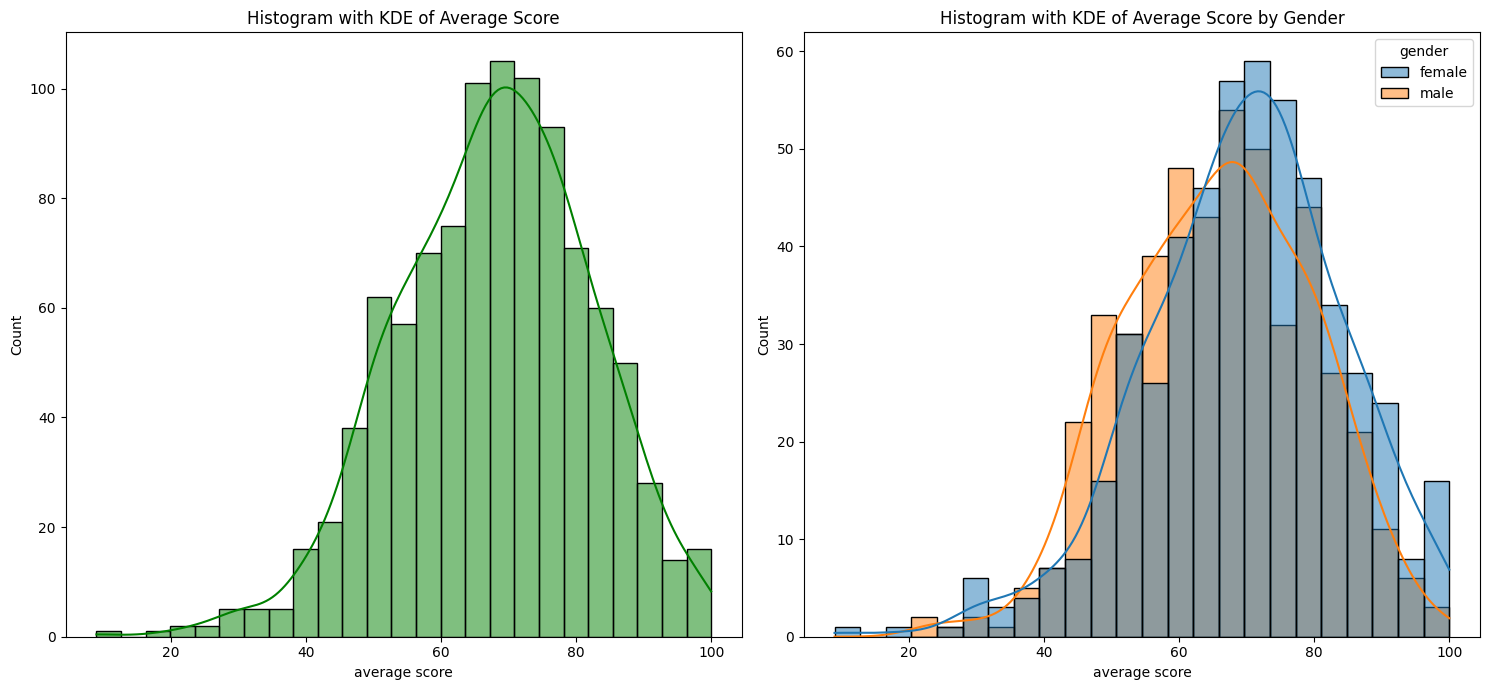

In [44]:
plt.figure(figsize=(15, 7))

# Plot histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='average score', bins=25, kde=True, color='g')
plt.title('Histogram with KDE of Average Score')

# Plot histogram with KDE by Gender
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='average score', kde=True, hue='gender')
plt.title('Histogram with KDE of Average Score by Gender')


plt.tight_layout()
plt.show()

**Insight**

From the above distribution, it is clear that female students perform better than male students.


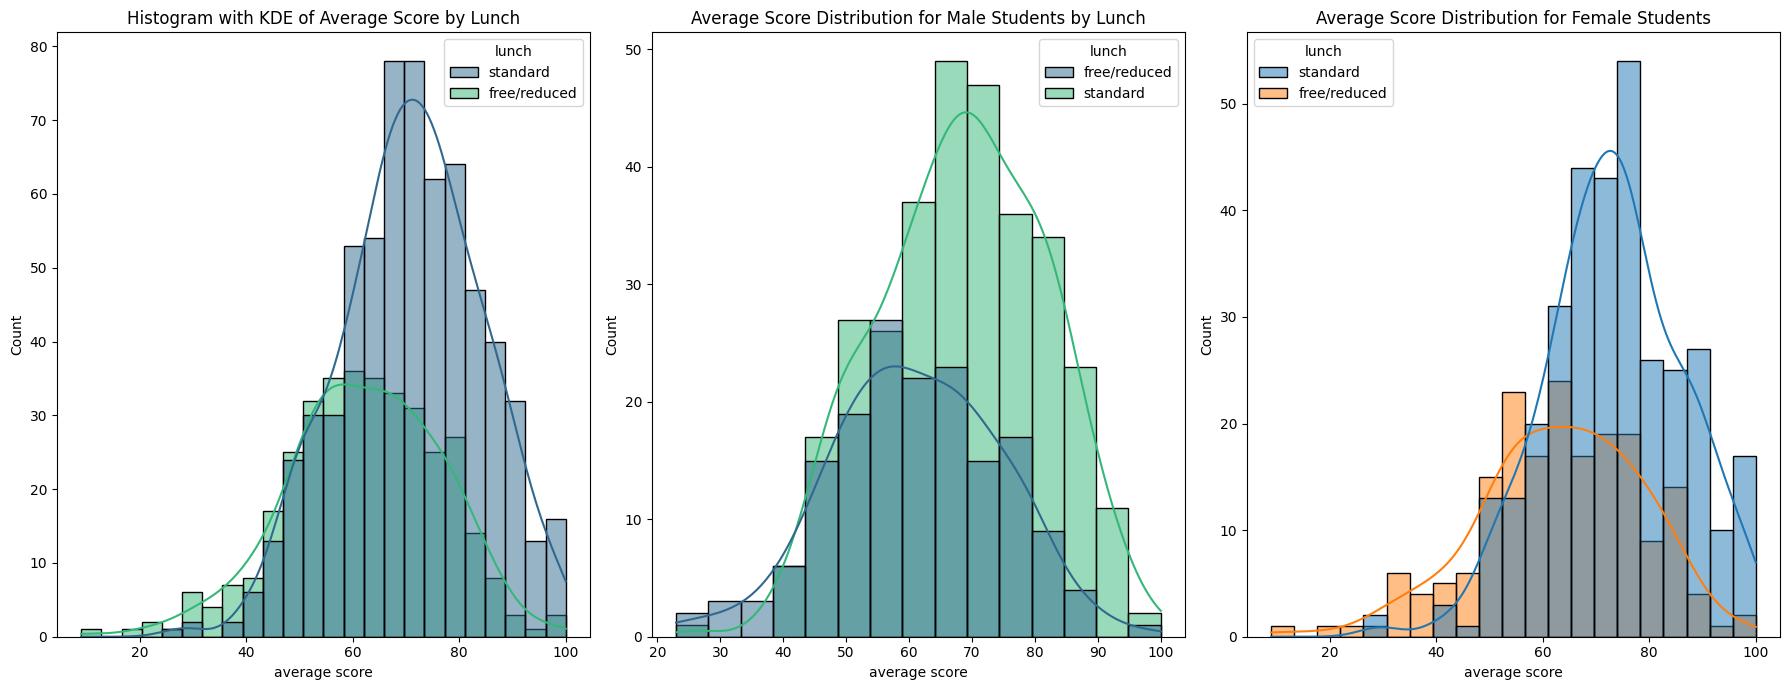

In [45]:
plt.figure(figsize=(18, 7))

# Plot histogram with KDE for different lunch types
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average score', hue='lunch', kde=True, palette='viridis')
plt.title('Histogram with KDE of Average Score by Lunch')

# Plot histogram with KDE for males by lunch type
plt.subplot(1, 3, 2)
sns.histplot(data=data[data['gender'] == 'male'], x='average score', hue='lunch', kde=True, palette='viridis')
plt.title('Average Score Distribution for Male Students by Lunch')

# Plot histogram with KDE for females by gender (though hue is redundant here)
plt.subplot(1, 3, 3)
sns.histplot(data=data[data['gender'] == 'female'], x='average score',hue='lunch', kde=True, color='pink')
plt.title('Average Score Distribution for Female Students')

plt.tight_layout()
plt.show()


**Insight**

Students with a standard lunch perform better than those with a free/reduced lunch.


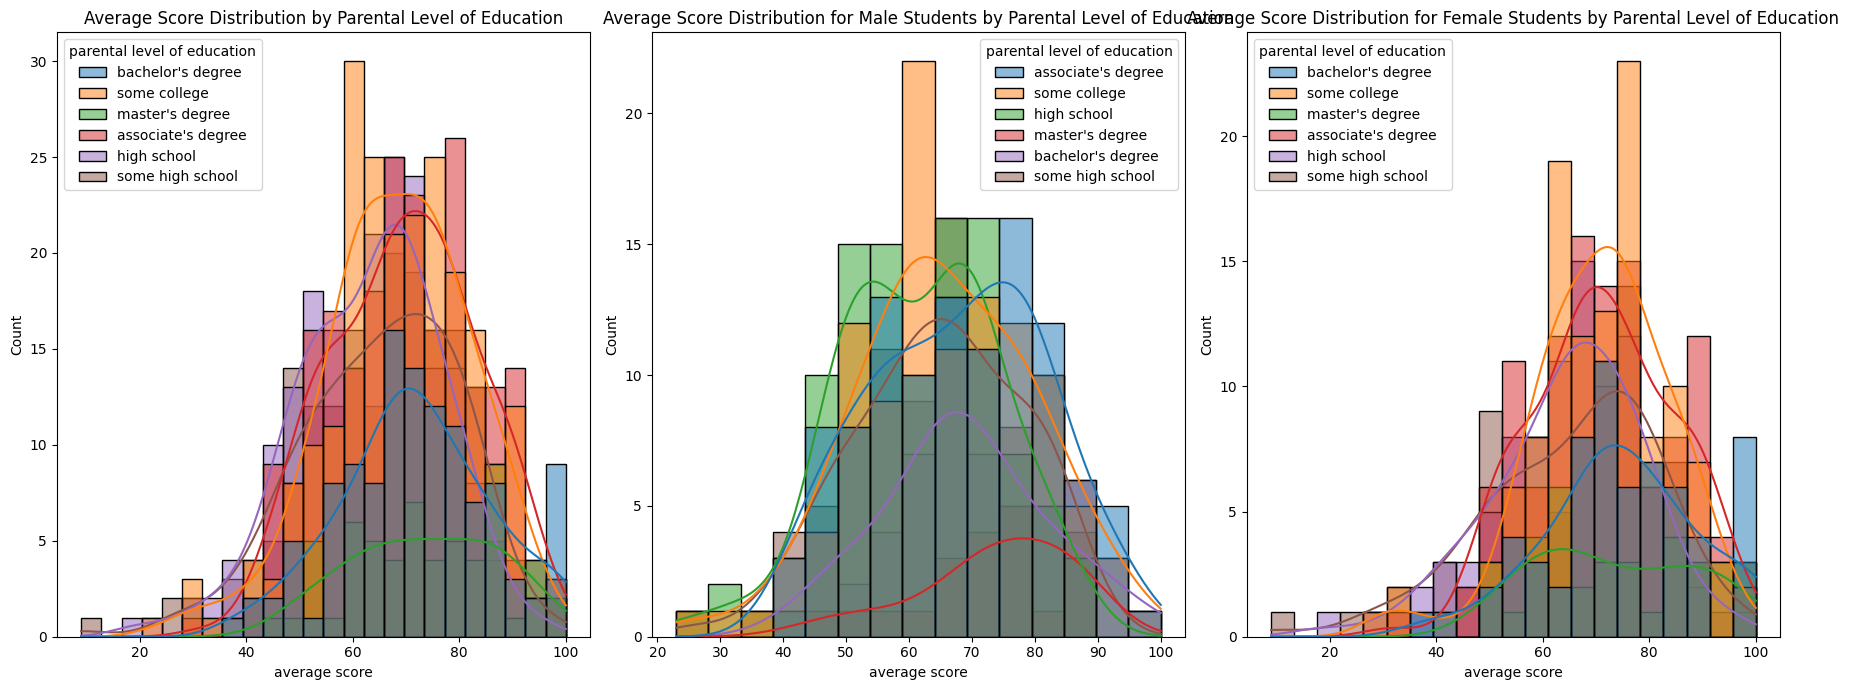

In [48]:
plt.figure(figsize=(18, 7))

# Plot histogram with KDE for different parental levels of education
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average score', hue='parental level of education', kde=True)
plt.title('Average Score Distribution by Parental Level of Education')

# Plot histogram with KDE for males by parental level of education
plt.subplot(1, 3, 2)
sns.histplot(data=data[data['gender'] == 'male'], x='average score', hue='parental level of education', kde=True)
plt.title('Average Score Distribution for Male Students by Parental Level of Education')

# Plot histogram with KDE for females by parental level of education
plt.subplot(1, 3, 3)
sns.histplot(data=data[data['gender'] == 'female'], x='average score', hue='parental level of education', kde=True)
plt.title('Average Score Distribution for Female Students by Parental Level of Education')

plt.tight_layout()
plt.show()


**Insight**

The level of parental education does not appear to have any significant impact on student performance on the test.


### 4.2 Categorical Data Distribution Visualization

This section visualizes the distribution of categorical variables using pie charts. The following features are analyzed:

- **Gender**
- **Race/Ethnicity**
- **Lunch**
- **Test Preparation Course**
- **Parental Level of Education**

These visualizations help understand the proportion of different categories within each feature.

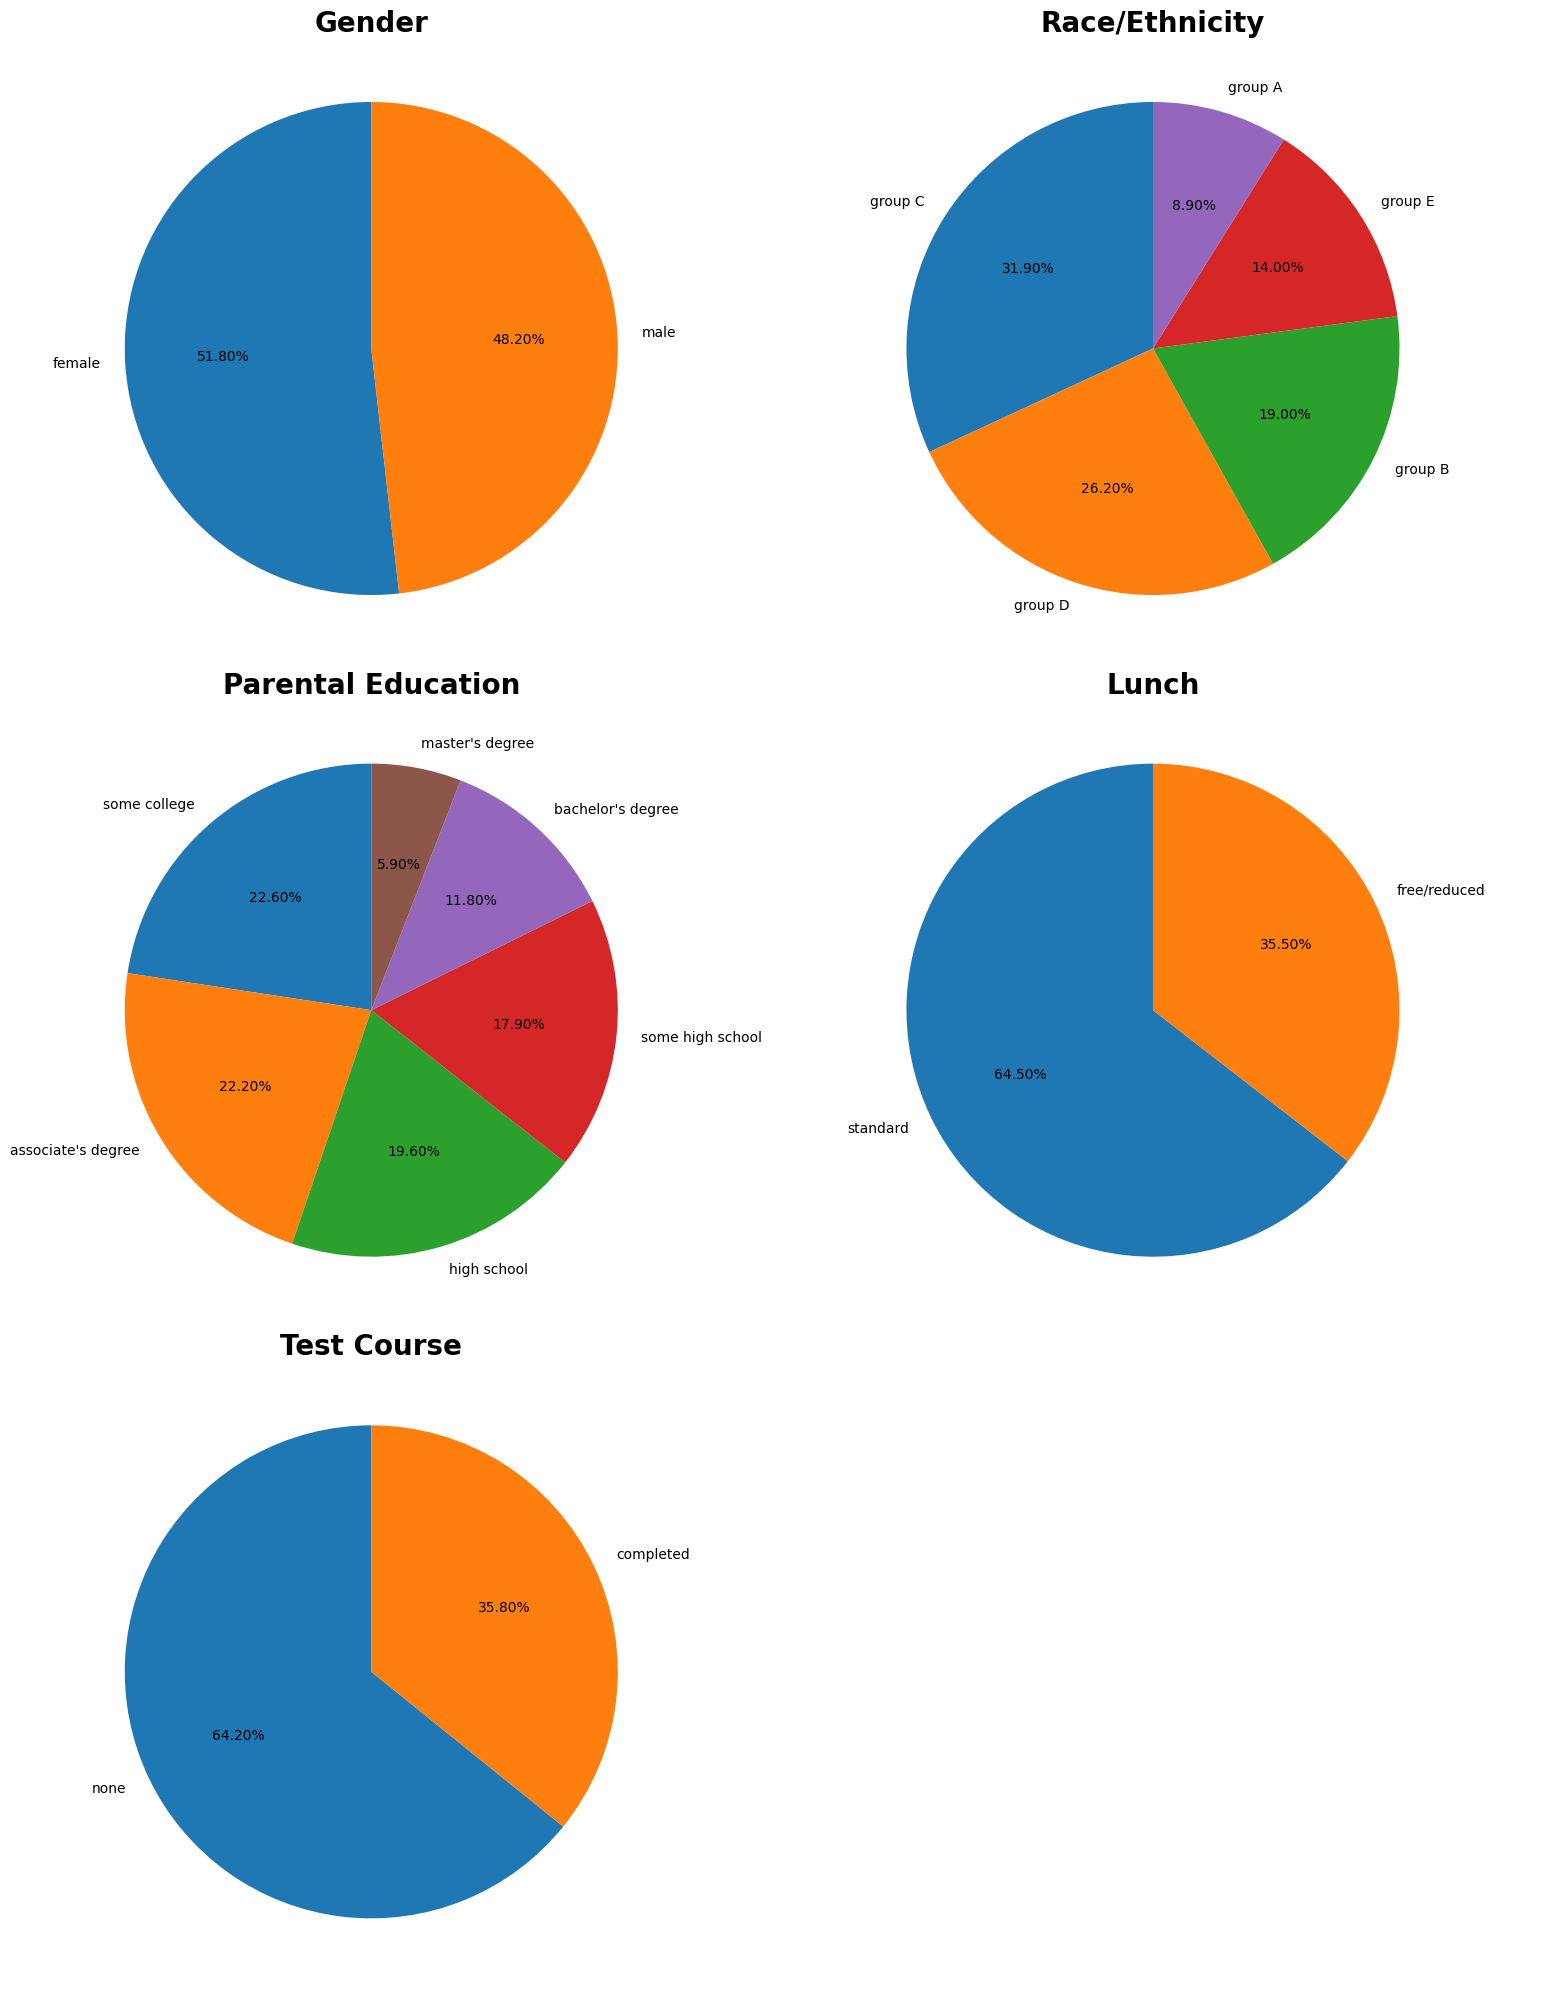

In [68]:
titles = ['Gender', 'Race/Ethnicity', 'Parental Education', 'Lunch', 'Test Course']

# Set figure size
plt.figure(figsize=(16, 20))

# Loop through each column and create a pie chart
for i, col in enumerate(categorical_featues):
    plt.subplot(3, 2, i + 1)
    size = data[col].value_counts()
    plt.pie(size, labels=size.index, autopct='%.2f%%', startangle=90)
    plt.title(titles[i], fontsize=20, fontweight='bold')

# Add an empty subplot to maintain the 3x2 grid structure
plt.subplot(3, 2, 6)
plt.axis('off')

plt.tight_layout()
plt.show()

**Insight**
- The gender distribution is fairly balanced, with females making up 51.80% and males at 48.20%.
- A significant majority of students (64.20%) have not completed the test preparation course, while 35.80% have completed it.
- Most students (64.50%) have standard lunch, with the remaining students receiving free or reduced lunch.
- The largest ethnic group is Group C (31.90%), followed by Group D (26.20%). The smallest groups are Group A (8.90%) and Group E (14%).
- In terms of parental education, the most common levels are some college (22.60%) and associate’s degree (22.20%), while the least common are bachelor’s (11.80%) and master’s degrees (5.90%).

### 4.3 Gender-Based Performance Analysis of Student Exam Scores

In [81]:
gender_group = data.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


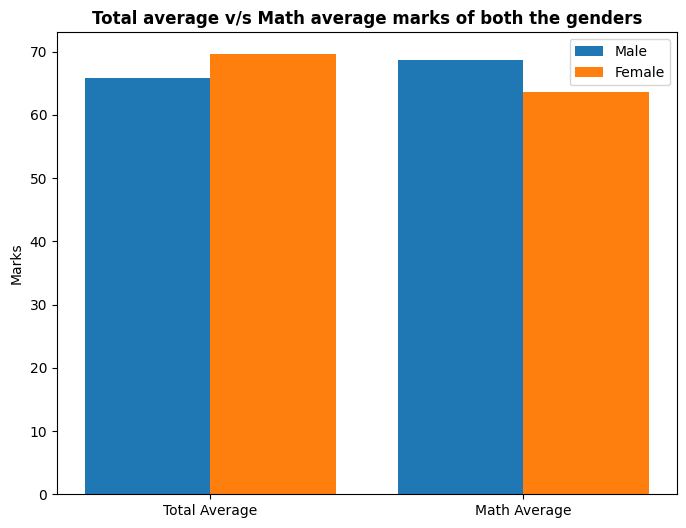

In [73]:
plt.figure(figsize=(8, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insight**
- Male students have a higher average math score (68.73) compared to female students (63.63).
- However, female students have a higher overall average score (69.57) compared to male students (65.84).

This suggests that while male students perform better in math, female students generally perform better across all subjects on average.

### 4.4 Average Exam Scores by Race/Ethnicity Group

In [92]:
race_ethinicty = data.groupby('race/ethnicity').mean(numeric_only=True).round(2).reset_index()
race_ethinicty[['race/ethnicity','math score', 'reading score', 'writing score']]

,race/ethnicity,math score,reading score,writing score
0,group A,61.63,64.67,62.67
1,group B,63.45,67.35,65.60
2,group C,64.46,69.10,67.83
3,group D,67.36,70.03,70.15
4,group E,73.82,73.03,71.41


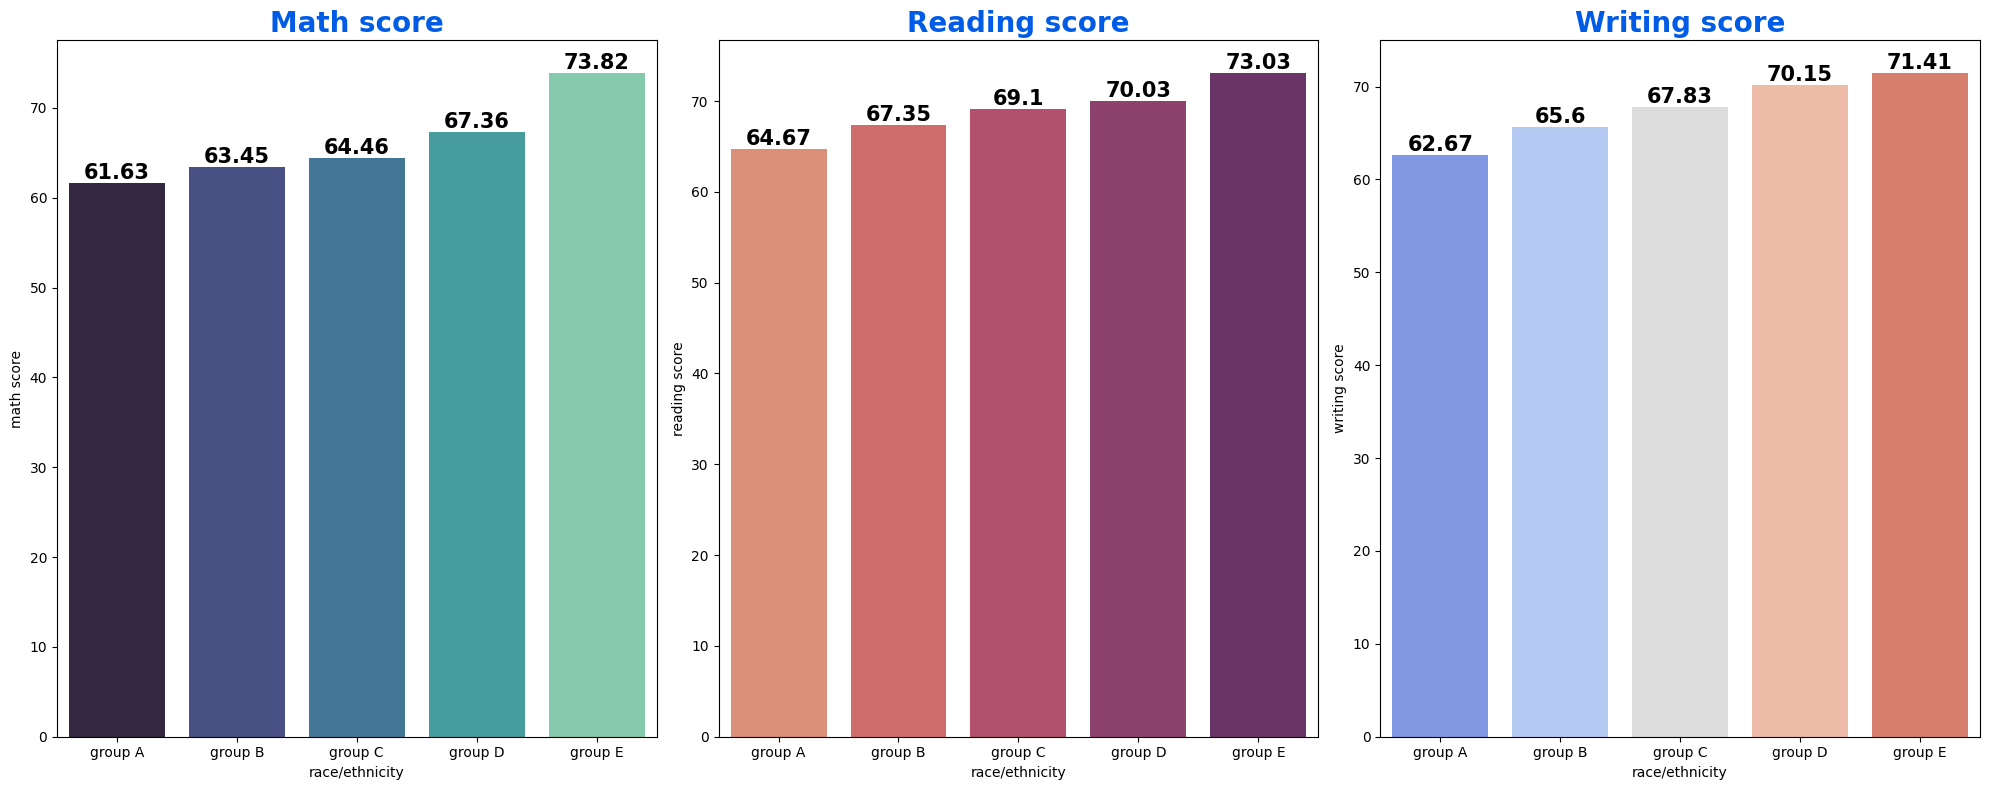

In [89]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_ethinicty['race/ethnicity'], y=race_ethinicty['math score'],palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20, fontweight='bold')

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15, fontweight='bold')

sns.barplot(x=race_ethinicty['race/ethnicity'] ,y=race_ethinicty['reading score'], palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20, fontweight='bold')

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fontweight='bold')

sns.barplot(x=race_ethinicty['race/ethnicity'] ,y=race_ethinicty['writing score'],palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20, fontweight='bold')

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fontweight='bold')

plt.tight_layout()

plt.show()

**Insight**
- **Group E** students have the highest average scores in all subjects, particularly excelling in math with an average score of 73.82.
- **Group D** students also perform well across all subjects, showing strong reading and writing scores.
- **Group A** students have the lowest average scores in all subjects, indicating a potential area for improvement.

The trend shows a consistent increase in scores across the groups from A to E, with Group E being the best performing and Group A the least.

### 4.5 Impact of Parental Education Level on Student Exam Scores

In [107]:
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.88,70.93,69.90
bachelor's degree,69.39,73.00,73.38
high school,62.14,64.70,62.45
master's degree,69.75,75.37,75.68
some college,67.13,69.46,68.84
some high school,63.50,66.94,64.89


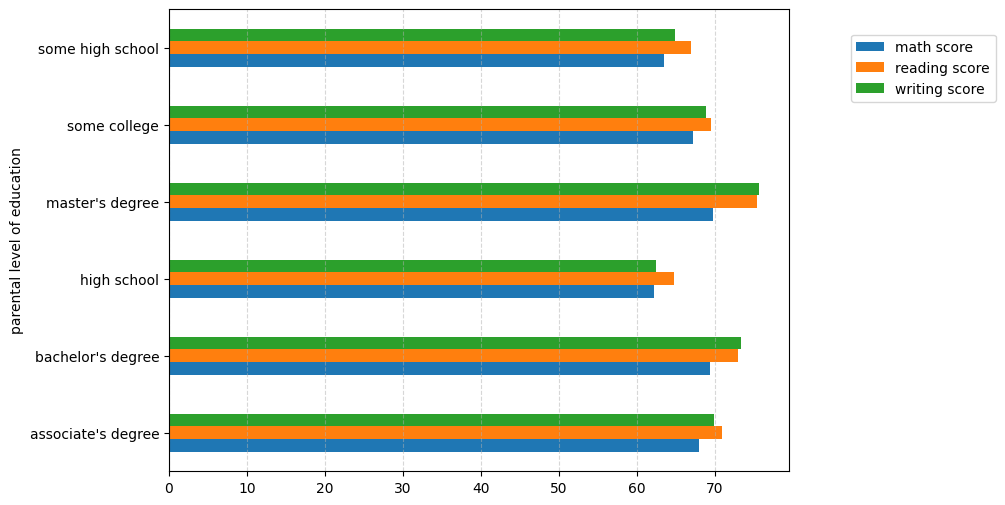

In [105]:
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().plot(kind='barh',figsize=(8, 6))
plt.legend(loc=(1.1, 0.8))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Insight:**
- Students with higher parental education levels tend to score better across all subjects. For instance, students with a master's degree in their parental background achieve the highest average scores in math (69.75), reading (75.37), and writing (75.68).
- Bachelor's degree holders also show strong performance, particularly in reading (73.00) and writing (73.38).

Students with high school education in their parental background score the lowest on average in all subjects, highlighting a potential influence of parental education on student performance

### 4.6 Impact of Lunch Type on Student Performance.

In [110]:
# Group by 'lunch' and calculate the mean scores
mean_scores = data.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().round(2)
mean_scores

,math score,reading score,writing score
lunch,,,
free/reduced,58.92,64.65,63.02
standard,70.03,71.65,70.82


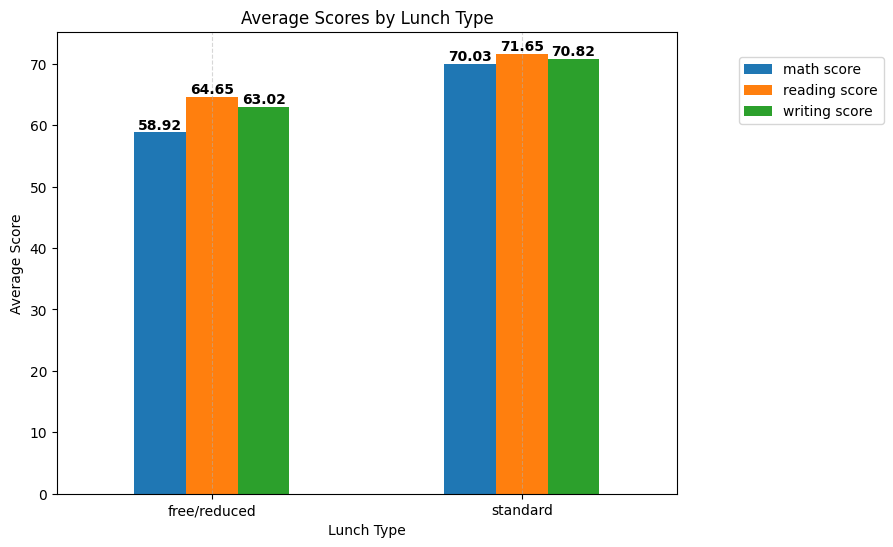

In [114]:
# Plotting
ax = mean_scores.plot(kind='bar', figsize=(8, 6))

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, color='black', fontweight='bold')

# Customize plot
plt.xticks(rotation = 0)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('Average Scores by Lunch Type')
plt.ylabel('Average Score')
plt.xlabel('Lunch Type')
plt.legend(loc=(1.1, 0.8))
# Show plot
plt.show()

**Insights**
- Students with Standard Lunch outperform those with Free/Reduced Lunch in all subjects: math (70.03 vs. 58.92), reading (71.65 vs. 64.65), and writing (70.82 vs. 63.02).
- The largest performance gap is in math, where students with Standard Lunch score significantly higher than those with Free/Reduced Lunch.

### 4.7 Checking For Outliers

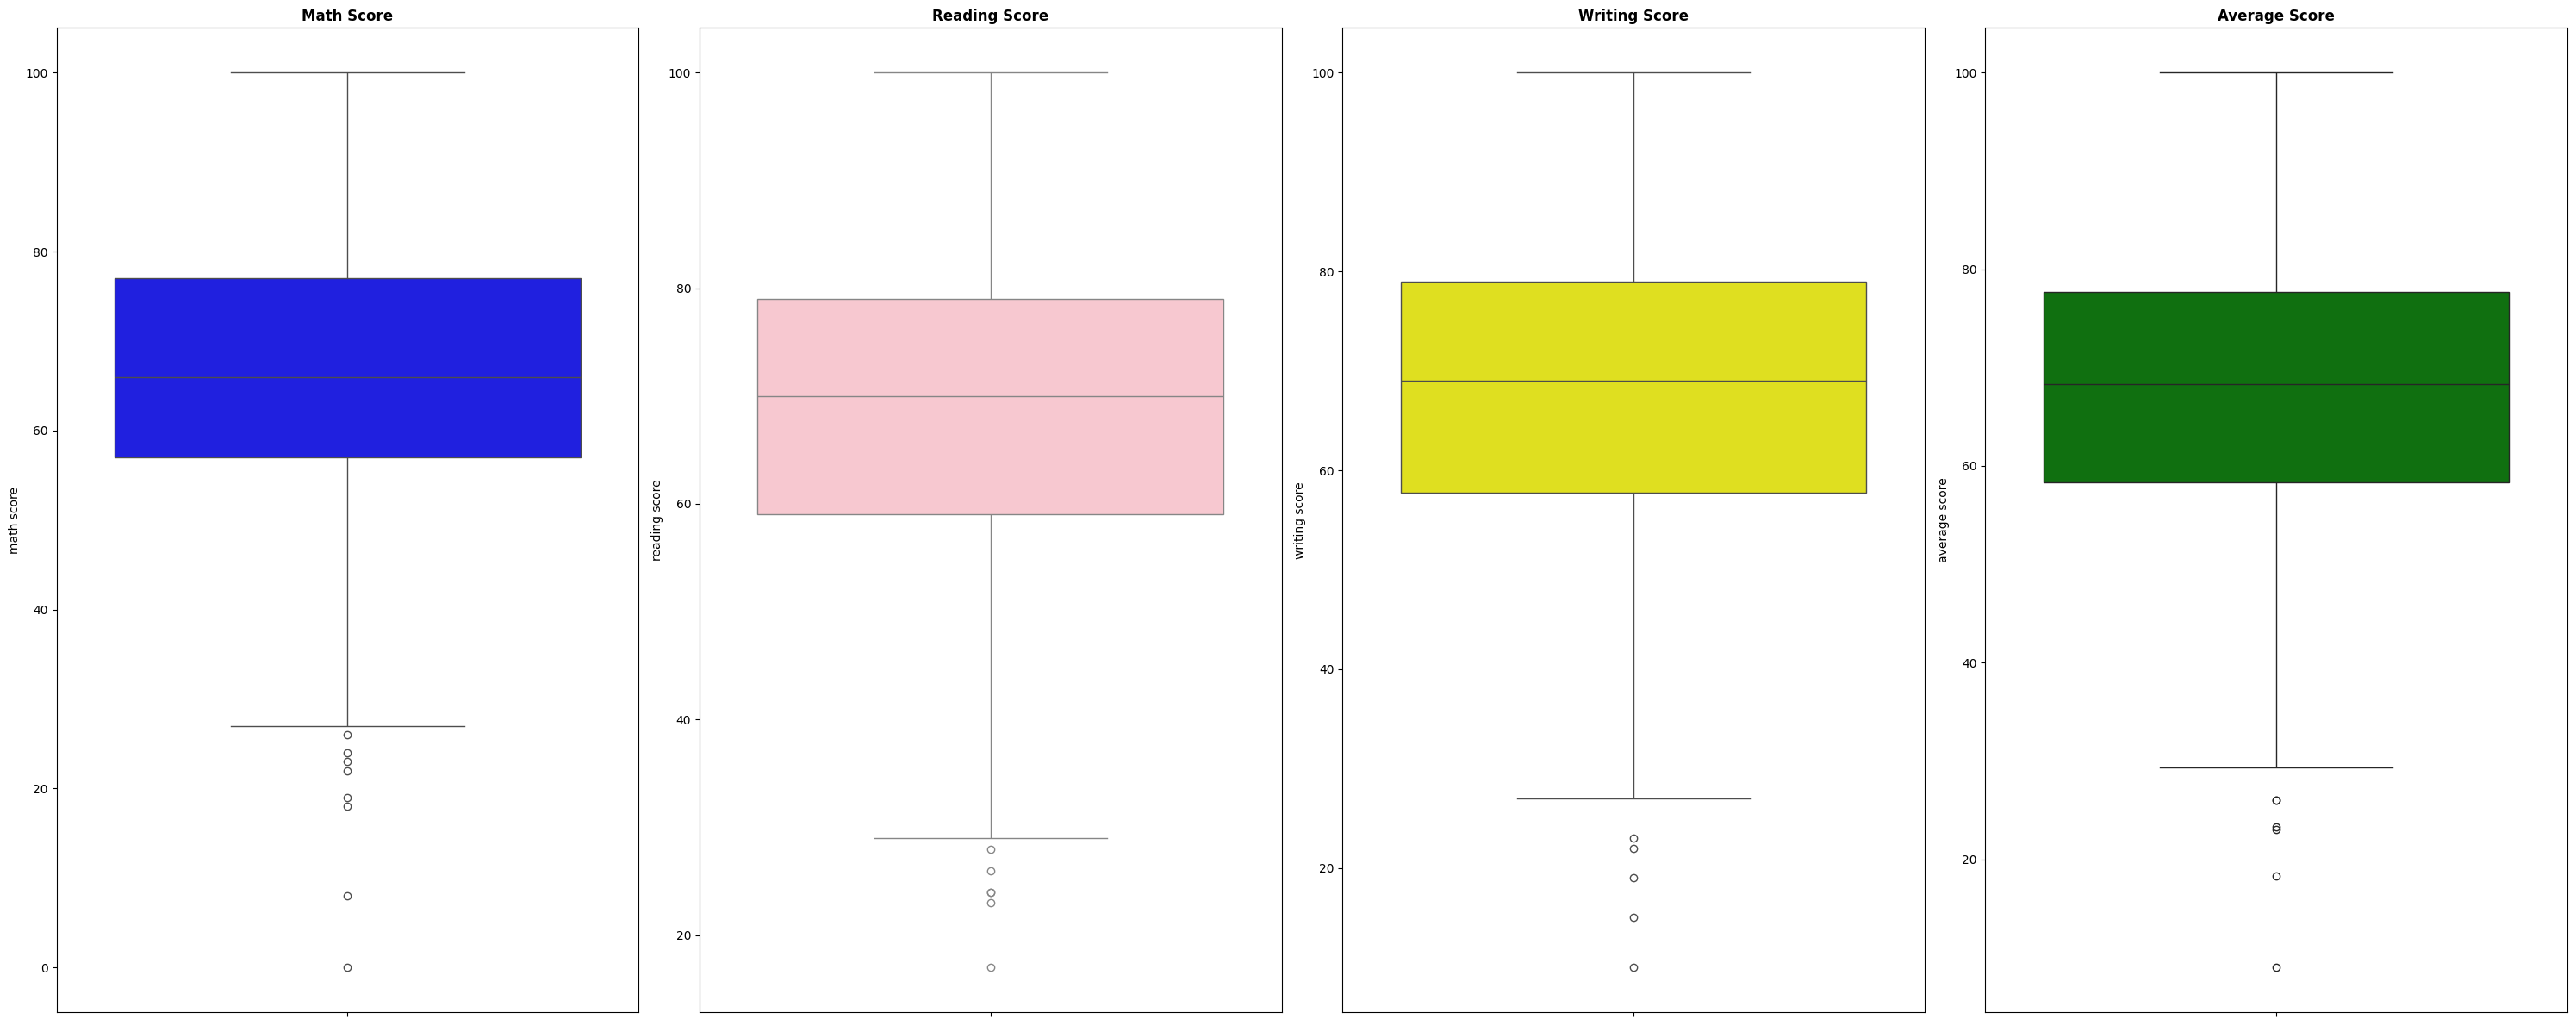

In [117]:
# Boxplot for Math Score
plt.subplot(1, 4, 1)
sns.boxplot(data['math score'], color='blue')
plt.title('Math Score', fontweight='bold')

# Boxplot for Reading Score
plt.subplot(1, 4, 2)
sns.boxplot(data['reading score'], color='pink')
plt.title('Reading Score',fontweight='bold')

# Boxplot for Writing Score
plt.subplot(1, 4, 3)
sns.boxplot(data['writing score'], color='yellow')
plt.title('Writing Score',fontweight='bold')

# Boxplot for Average Score
plt.subplot(1, 4, 4)
sns.boxplot(data['average score'], color='green')
plt.title('Average Score',fontweight='bold')

plt.tight_layout()
plt.show()

### 4.8 Exploration of Relationships Between Exam Scores by Gender

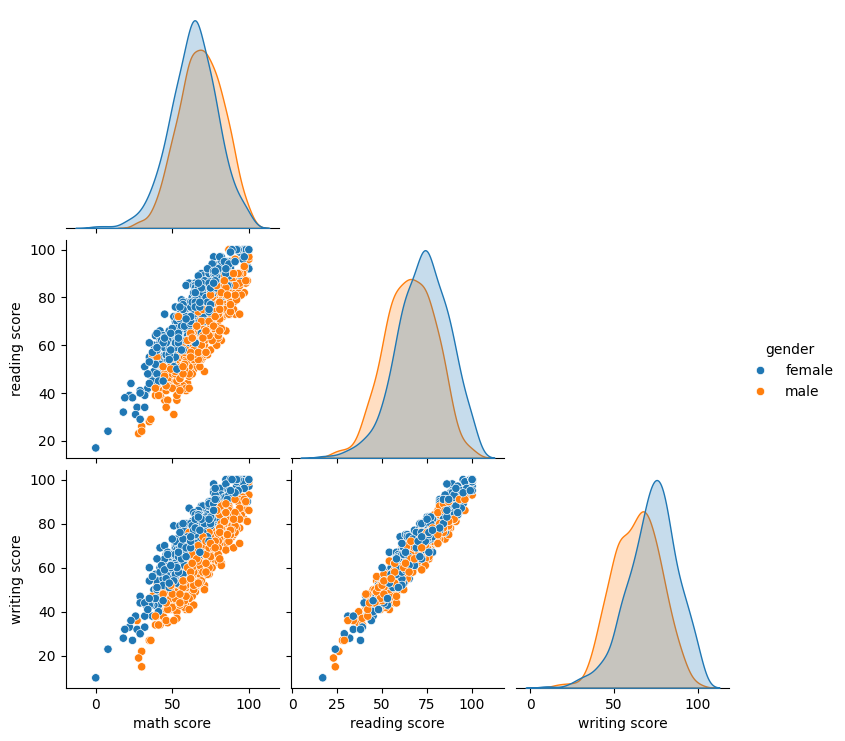

In [120]:
sns.pairplot(data[['math score', 'reading score', 'writing score', 'gender']],hue = 'gender', corner=True)
plt.show()

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

### 4.9 Correlation Analysis of Student Performance Across Math, Writing, and Reading Scores

In [126]:
data[['math score', 'writing score', 'reading score']].corr(numeric_only=True).round(2)

,math score,writing score,reading score
math score,1.00,0.80,0.82
writing score,0.80,1.00,0.95
reading score,0.82,0.95,1.00


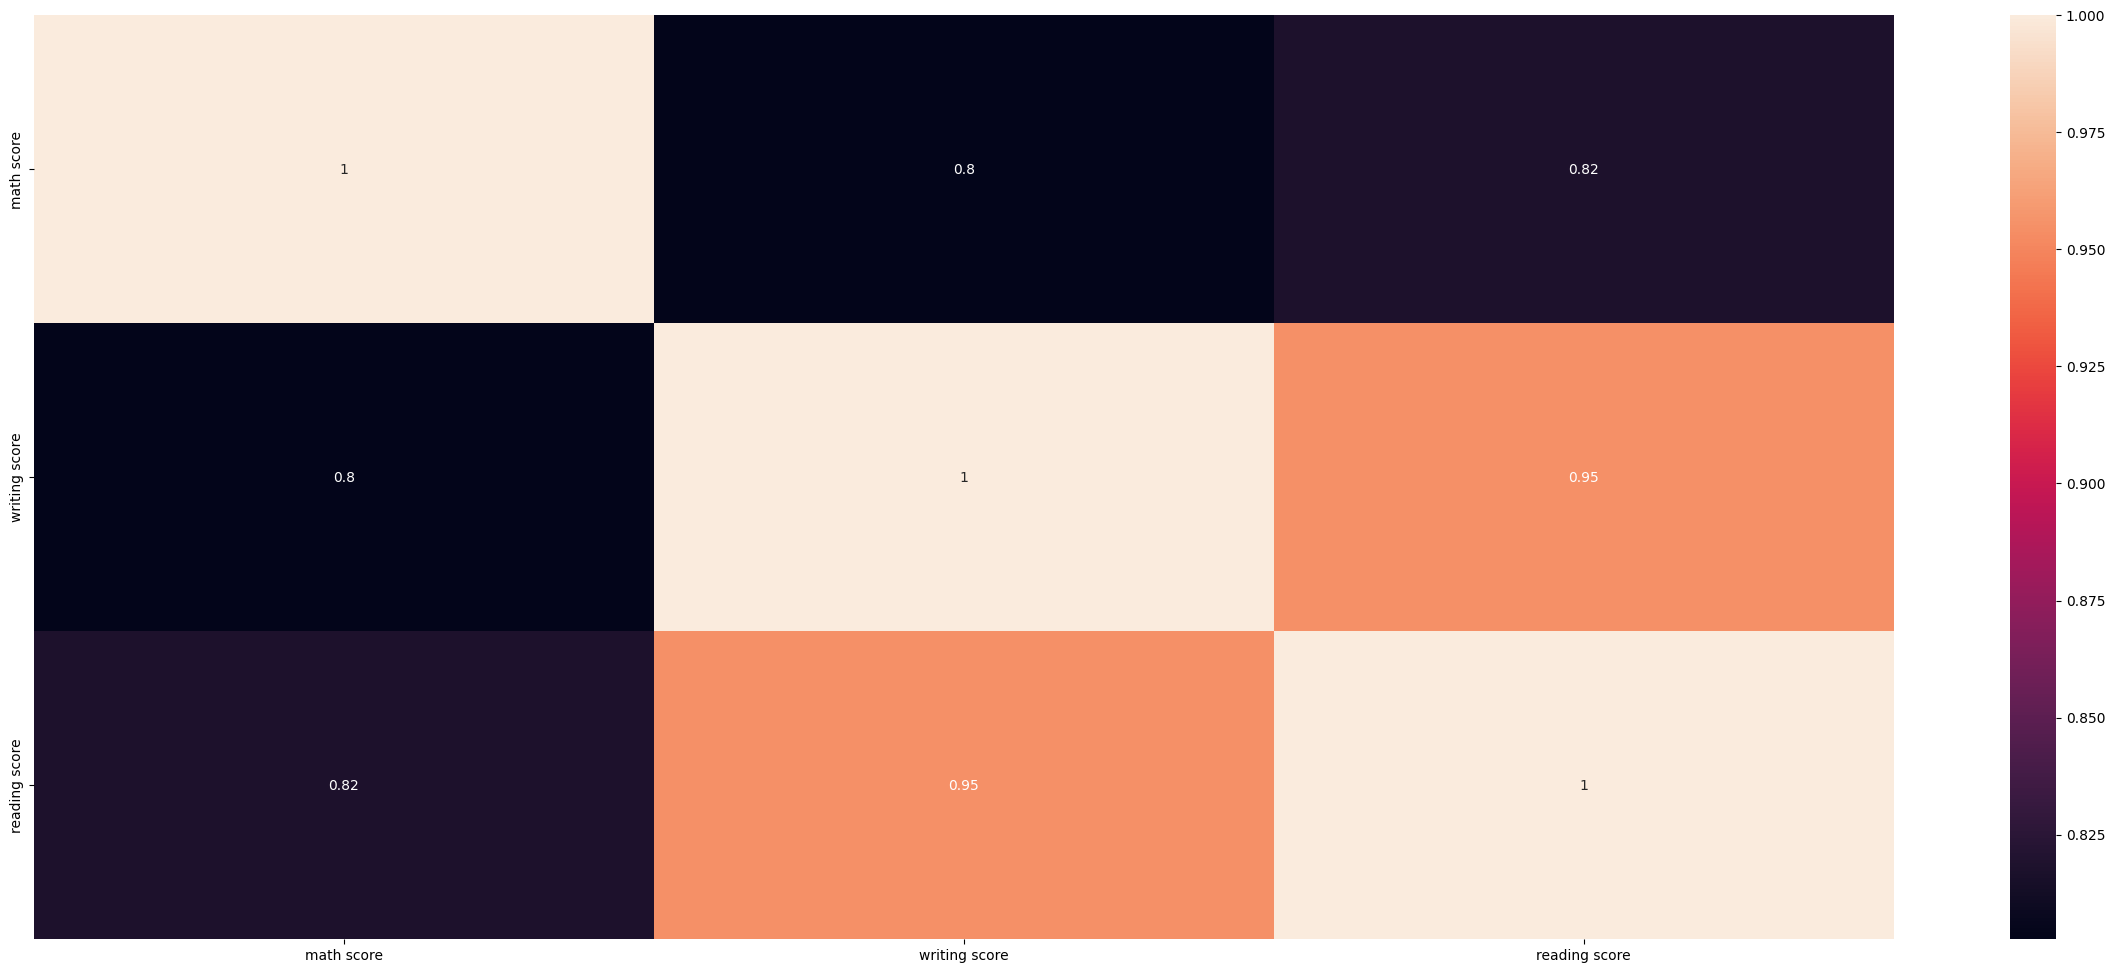

In [123]:
sns.heatmap(data[['math score', 'writing score', 'reading score']].corr(numeric_only=True), annot=True)
plt.show()

**Insights:**
- Strong Positive Correlations: All scores are strongly correlated with each other. This means that students who perform well in one area (e.g., math) tend to perform well in others (e.g., writing and reading).
- Highest Correlation: The highest correlation is between writing and reading scores (0.95), indicating that students who excel in writing also tend to excel in reading.

## 5 Conclusion
- **Performance Factors:** Students' performance is influenced by lunch type, race, and parental education level.
- **Gender Performance:** Females outperform males in both pass percentage and top scores.
- **Test Preparation Course:** The impact of completing a test preparation course on performance is not significant, but finishing it can be beneficial.